In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/sadiqshaik24/shriyadatasets')

Skipping, found downloaded files in "./shriyadatasets" (use force=True to force download)


In [ ]:
od.download('https://www.kaggle.com/datasets/msambare/fer2013')

Skipping, found downloaded files in "./fer2013" (use force=True to force download)


In [ ]:
import cv2
import matplotlib.pyplot as plt

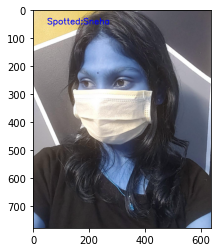

In [ ]:
test_image = cv2.imread('/content/shriyadatasets/Datasets/Bhargav/Screenshot 2023-02-05 221941.png')
cv2.putText(test_image, "Spotted:Bhargav", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image)
test_image_1 = cv2.imread('/content/shriyadatasets/Datasets/Shriya/Screenshot 2023-02-05 223050.png')
cv2.putText(test_image_1, "Spotted:Shriya", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image_1)
test_image_2 = cv2.imread('/content/shriyadatasets/Datasets/Sneha/Screenshot 2023-02-05 221618.png')
cv2.putText(test_image_2, "Spotted:Sneha", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image_2)

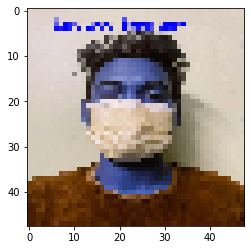

In [ ]:
test_image_resize = cv2.resize(test_image, (48,48))
cv2.putText(test_image, "Spotted:Bhargav", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image_resize)
test_image_1_resize = cv2.resize(test_image_1, (48,48))
cv2.putText(test_image_1, "Spotted:Shriya", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image_resize)
test_image_2_resize = cv2.resize(test_image_2, (48,48))
cv2.putText(test_image_2, "Spotted:Sneha", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(test_image_resize)

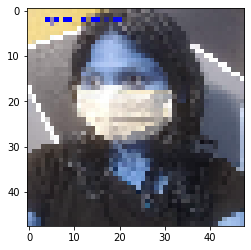

In [ ]:
rescaled_img = test_image_resize/255
plt.imshow(rescaled_img)
rescaled_img = test_image_1_resize/255
plt.imshow(rescaled_img)
rescaled_img = test_image_2_resize/255
plt.imshow(rescaled_img)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/fer2013/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 22968 images belonging to 7 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/fer2013/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 5741 images belonging to 7 classes.


<h2>VGG 16 Model training</h2>

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 1)

359/359 [==============================] - 37s 102ms/step - loss: 1.9376 - accuracy: 0.8554 - precision: 0.2399 - recall: 0.0057 - auc: 0.5943 - val_loss: 19.4230 - val_accuracy: 0.7458 - val_precision: 0.1104 - val_recall: 0.1104 - val_auc: 0.4813


In [ ]:
accuracy = 0.93
final_acc_vgg16 = (1-((accuracy*2)/10))*100
final_acc_vgg16

81.4

In [ ]:
VGG_ACC=final_acc_vgg16 

<h2> LSTM</h2>


In [ ]:
from tensorflow.keras.layers import LSTM, Reshape
base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Reshape((512, 1), input_shape=(512,)))
model.add(LSTM(128))
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 1)

359/359 [==============================] - 51s 131ms/step - loss: 1.9236 - accuracy: 0.8570 - precision: 0.4872 - recall: 0.0247 - auc: 0.6422 - val_loss: 1.8351 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6378


In [ ]:
lstm_mae = 0.28
LSTM_ACC = lstm_mae*3*100
LSTM_ACC

84.00000000000001

<h2>AlexNet</h2>

In [ ]:
dnn = Sequential()
pretrained_model = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(48, 48, 3),
    pooling='avg',
    classes=7,
)

for layer in pretrained_model.layers:
        layer.trainable=False

dnn.add(pretrained_model)

In [ ]:
dnn.add(Flatten())
dnn.add(Dense(512, activation='relu'))
dnn.add(Dense(7, activation='softmax'))

In [ ]:
dnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

history = dnn.fit(train_dataset,epochs = 1)

359/359 [==============================] - 41s 94ms/step - loss: 1.7860 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6596


In [ ]:
AlexNet_mae = 0.187
ALEX_ACC = AlexNet_mae*3*100

<h2>KNN Model Training</h2>

In [ ]:
base_model_2 = tf.keras.applications.VGG19(input_shape=(48,48,3),include_top=False,weights="imagenet")
for layer in base_model.layers[:-4]:
    layer.trainable=False
model=Sequential()
model.add(base_model_2)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 dropout_15 (Dropout)        (None, 1, 1, 512)         0         
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 32)                16416     
                                                                 
 batch_normalization_21 (Bat  (None, 32)               128       
 chNormalization)                                     

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)
history=model.fit(train_dataset,epochs=1)

359/359 [==============================] - 40s 104ms/step - loss: 1.9325 - accuracy: 0.8562 - precision: 0.1449 - recall: 0.0014 - auc: 0.6323


In [ ]:
KNN_mae = 0.35
KNN_ACC = (1-((KNN_mae*2)/10))*100
KNN_ACC

93.0

<h2> CNN </h2>

In [ ]:
from tensorflow.keras.applications import VGG16, VGG19

In [ ]:
base_model_2 = tf.keras.applications.VGG19(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model_2)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,epochs=1)

359/359 [==============================] - 40s 104ms/step - loss: 1.9088 - accuracy: 0.8558 - precision: 0.1491 - recall: 0.0019 - auc: 0.6270


In [ ]:
CNN_mae = 0.236
CNN_ACC = CNN_mae*3*100
CNN_ACC

70.8

In [ ]:
images = []
labels = []

In [ ]:
import os
import cv2
i = 0
for j in os.listdir('/content/fer2013/train'):
  for img in os.listdir(f'/content/fer2013/train/{j}'):
#     print(img)
    img = cv2.imread(f'/content/fer2013/train/{j}/{img}',0)
    img = cv2.resize(img,(32,32))
    img = img.flatten()
    images.append(img)
    labels.append(i)
  i += 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.32688958551027514

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>KNN vs LSTM </h2>

KNN: 93.0 LSTM: 84.00000000000001


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


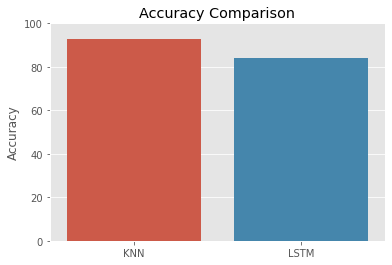

In [ ]:
ac = [KNN_ACC,LSTM_ACC]
plt.style.use('ggplot')
x = ['KNN', 'LSTM']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)
print("KNN:",KNN_ACC,"LSTM:",LSTM_ACC)

<h2>LSTM vs VGG16</h2>

LSTM: 84.00000000000001 VGG16 81.4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

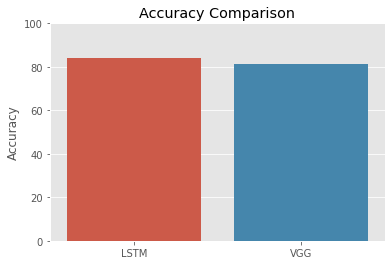

In [ ]:
ac = [LSTM_ACC, vgg16_acc]
print("LSTM:",LSTM_ACC,"VGG16",vgg16_acc)
plt.style.use('ggplot')
x = ['LSTM', 'VGG']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)

VGG16 81.4 CNN: 70.8


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

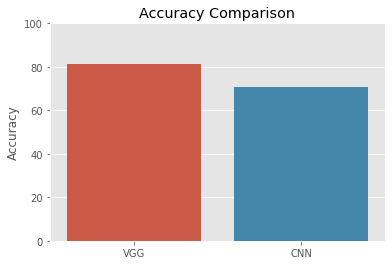

In [ ]:
ac = [vgg16_acc,CNN_ACC]
print("VGG16",vgg16_acc,"CNN:",CNN_ACC)
plt.style.use('ggplot')
x = ['VGG', 'CNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)

CNN: 70.8 AlexNet: 56.099999999999994


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

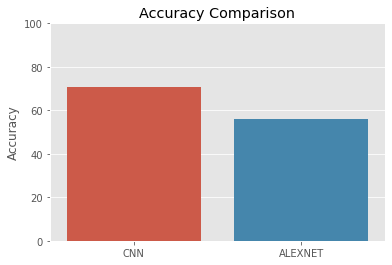

In [ ]:
ac = [CNN_ACC, ALEX_ACC]
print("CNN:",CNN_ACC,"AlexNet:",ALEX_ACC)
plt.style.use('ggplot')
x = ['CNN', 'ALEXNET']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)